# Matplolib Bar charts



In [36]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Create dataframe

In [37]:
raw_data = {'officer_name': ['Jake', 'Amy', 'Terry', 'Charles', 'Rosa'],
        'jan_arrests': [10, 13, 31, 2, 3],
        'feb_arrests': [13, 9, 10, 2, 7],
        'march_arrests': [21, 18, 22, 3, 5]}
df = pd.DataFrame(raw_data, columns = ['officer_name', 'jan_arrests', 'feb_arrests', 'march_arrests'])
df

,officer_name,jan_arrests,feb_arrests,march_arrests
0,Jake,10,13,21
1,Amy,13,9,18
2,Terry,31,10,22
3,Charles,2,2,3
4,Rosa,3,7,5


In [38]:
# Create/add columns with the average arrests for each officer as well as their std
sub_df = df[['jan_arrests', 'feb_arrests', 'march_arrests']]
df['mean'] = sub_df.mean(axis=1)
df['std'] = sub_df.std(axis=1)
df

,officer_name,jan_arrests,feb_arrests,march_arrests,mean,std
0,Jake,10,13,21,14.666667,5.686241
1,Amy,13,9,18,13.333333,4.509250
2,Terry,31,10,22,21.000000,10.535654
3,Charles,2,2,3,2.333333,0.577350
4,Rosa,3,7,5,5.000000,2.000000


## Bar chart with error bars 

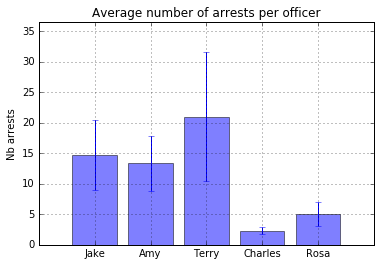

In [39]:
# Plot bars
labels = df['officer_name']
mean_values = df['mean']
err_values = df['std']
top_margin = 5
x_pos = list(xrange(len(labels)))
plt.bar(x_pos, mean_values, yerr=err_values, align='center', alpha=0.5)

plt.grid()

# Set height of the y-axis
max_y = max(zip(mean_values, err_values))
plt.ylim([0, (max_y[0] + max_y[1]) + top_margin])

# Set axes, labels and title
plt.ylabel('Nb arrests')
plt.xticks(x_pos, labels)
plt.title('Average number of arrests per officer')

plt.show()

## Horizontal Bar chart with error bars 


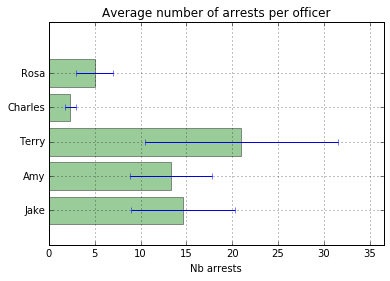

In [40]:
# Plot horizontal bars
labels = df['officer_name']
mean_values = df['mean']
err_values = df['std']
y_pos = np.arange(len(mean_values))
y_pos = [x for x in y_pos]
plt.yticks(y_pos, labels, fontsize=10)
plt.barh(y_pos, mean_values, xerr=err_values, align='center', alpha=0.4, color='g')

# Set axes, labels and title
max_x = max(zip(mean_values, err_values))
plt.xlabel('Nb arrests')
t = plt.title('Average number of arrests per officer')
plt.ylim([-1,len(mean_values)+0.5])
plt.xlim([0, (max_y[0] + max_y[1]) + top_margin])
plt.grid()

plt.show()

### Stacked bar charts

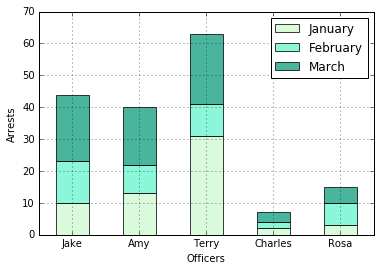

In [41]:
# Create the general blog and the "subplots" i.e. the bars
f, ax = plt.subplots(1)

# Set plot attributes
colors = ['#cef9d1', '#66f4cc', '#0c9c7c']
alpha = 0.75
# Set the bar width
bar_width = 0.5
# Positions of the x-axis ticks
x_pos = list(xrange(len(labels)))

# Create bar plot for January arrests
ax.bar(x_pos, df['jan_arrests'], 
        width=bar_width, 
        label='January',
        align='center',
        alpha=alpha, 
        color=colors[0])

# Stack February arrests on top of January result
ax.bar(x_pos, df['feb_arrests'], 
        width=bar_width, 
        bottom=df['jan_arrests'], 
        label='February',
        align='center',
        alpha=alpha, color=colors[1])

# Stack March arrests on top of January and February results
ax.bar(x_pos, df['march_arrests'], 
        width=bar_width, 
        bottom=df['jan_arrests'] + df['feb_arrests'], 
        label='March',
        align='center',
        alpha=alpha, 
        color=colors[2])

# Set the xticks, label and legends
plt.xticks(x_pos, df['officer_name'])
ax.set_ylabel("Arrests")
ax.set_xlabel("Officers")
plt.legend(loc='best')

# Set a buffer around the edge
plt.xlim([min(x_pos)-bar_width, max(x_pos)+bar_width])
plt.grid()